# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

n     Energy            log10(ΔE)   log10(Δρ)   Δtime
---   ---------------   ---------   ---------   ------
  1   +30.44398177260                   -1.40    6.36s
  2   +20.26671065909        1.01       -0.92   12.3ms
  3   +15.05727363940        0.72       -0.58   12.2ms
  4   +14.13602289466       -0.04       -0.54   10.0ms
  5   +12.32047562166        0.26       -0.56   10.0ms
  6   +10.22045459451        0.32       -0.51   10.0ms
  7   +9.342864567526       -0.06       -0.58   9.88ms
  8   +8.723175558155       -0.21       -0.71   9.89ms
  9   +8.328305787754       -0.40       -0.88   9.93ms
 10   +8.099891667106       -0.64       -0.94   9.89ms
 11   +8.087965590749       -1.92       -1.08   7.76ms
 12   +8.018873968447       -1.16       -1.20   7.69ms
 13   +7.970649658043       -1.32       -1.17   7.67ms
 14   +7.959541879809       -1.95       -1.08   7.67ms
 15   +7.916787437186       -1.37       -1.17   7.67ms
 16   +7.883134430809       -1.47       -1.13   7.69ms
 17   +7.85

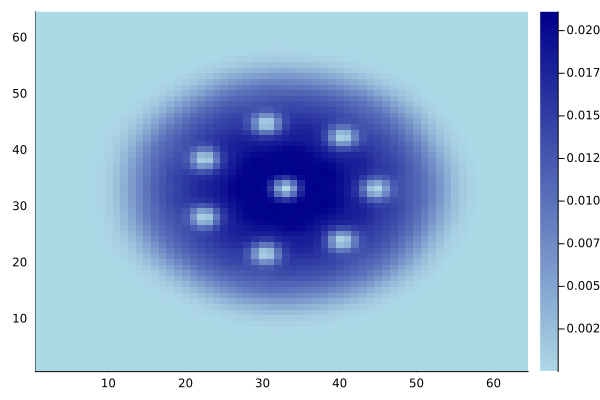

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential, and magnetic vector potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);


# Parameters
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

# Collect all the terms, build and run the model
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)